In [ ]:
# !pip list -v

In [2]:
!pip install talib-binary
!pip install yfinance

ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary
You should consider upgrading via the '/home/mskolnik/.virtualenvs/stock_price_predictor/bin/python -m pip install --upgrade pip' command.
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
You should consider upgrading via the '/home/mskolnik/.virtualenvs/stock_price_predictor/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

You should consider upgrading via the '/home/mskolnik/.virtualenvs/stock_price_predictor/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 12.2 MB 505 kB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.2
    Uninstalling pandas-1.3.2:
      Successfully uninstalled pandas-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.4 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
You should consider upgrading via the '/home/mskolnik/.virtual

In [1]:
import talib as ta
import joblib
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import yfinance as yahoo_finance

In [2]:
#suppress 'SettingWithCopy' warning
pd.set_option('mode.chained_assignment', None)

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

In [5]:
# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False) 

In [6]:
#optional 
#yahoo_finance.pdr_override()

In [7]:
%matplotlib inline

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
# ___variables___
#ticker = 'TSLA'
#ticker = 'AAPL'
#ticker = 'NFLX'
#ticker = 'MSFT'
#ticker = 'NFLX'
#ticker = 'GOOGL'
#ticker = 'AMZN'
ticker = 'MOS'
#ticker = 'TLT'
#ticker = 'IBM'
#ticker = 'F'
#ticker = 'C'
#ticker = 'PG'
#ticker = 'JNJ'
# ticker = 'SWK' # Stanley Black & Decker
# ticker = "PPIACO" # PPI

start_time = datetime.datetime(1900, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [10]:
def get_data(ticker):
    # yahoo gives only daily historical data
    connected = False
    while not connected:
        try:
            df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
            connected = True
            print('connected to yahoo')
        except Exception as e:
            print("type error: " + str(e))
            time.sleep( 5 )
            pass   

    # use numerical integer index instead of date    
    df = df.reset_index()
    #print(df.head(5))
    return df

In [11]:
df = get_data(ticker)

connected to yahoo


In [ ]:
# df.head()

In [12]:
df = df.sort_values(by="Date")

In [13]:
df.head()

Date     High      Low     Open    Close     Volume  Adj Close
0 1988-01-26  11.7500  11.2500  11.5000  11.5000  7244600.0   7.283531
1 1988-01-27  12.3750  11.4375  11.5625  12.3750  3652400.0   7.837718
2 1988-01-28  12.5625  12.1250  12.2500  12.5625  2180000.0   7.956471
3 1988-01-29  12.5625  11.8750  12.4375  12.2500  1335400.0   7.758543
4 1988-02-01  12.2500  11.9375  12.1250  12.0000   488800.0   7.600211

### Compute various stock technical indicators
For each stock we compute several technical indicators, we use mainly exponential moving averages, Bollinger Bands, RSI and so on. We will then feed these into neural network as features (or values derived from these indicators).

In [15]:
def compute_technical_indicators(df):
    # df['EMA5'] = ta.EMA(df['Adj Close'].values, timeperiod=5)
    # df['EMA10'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    # df['EMA15'] = ta.EMA(df['Adj Close'].values, timeperiod=15)
    # df['EMA20'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    # df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
    # df['EMA40'] = ta.EMA(df['Adj Close'].values, timeperiod=40)
    df['MA50'] = ta.MA(df['Adj Close'].values, timeperiod=50)

    # df['EMA60'] = ta.EMA(df['Adj Close'].values, timeperiod=60)
    # df['EMA70'] = ta.EMA(df['Adj Close'].values, timeperiod=70)
    # df['EMA80'] = ta.EMA(df['Adj Close'].values, timeperiod=80)
    # df['EMA90'] = ta.EMA(df['Adj Close'].values, timeperiod=90)
    
    df['MA100'] = ta.MA(df['Adj Close'].values, timeperiod=100)
    # df['EMA150'] = ta.EMA(df['Adj Close'].values, timeperiod=150)
    df['MA200'] = ta.MA(df['Adj Close'].values, timeperiod=200)

    df['upperBB'], df['middleBB'], df['lowerBB'] = ta.BBANDS(df['Adj Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    df['SAR'] = ta.SAR(df['High'].values, df['Low'].values, acceleration=0.02, maximum=0.2)

    # we will normalize RSI
    df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)

    df['normRSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14) / 100.0

    # My new additions
    df["LR100Day"] = ta.LINEARREG(df['Adj Close'].values, timeperiod=100)
    df["LR200Day"] = ta.LINEARREG(df['Adj Close'].values, timeperiod=200)

    df["CDL3LINESTRIKE"] = ta.CDL3LINESTRIKE(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDL3WHITESOLDIERS"] = ta.CDL3WHITESOLDIERS(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLENGULFING"] = ta.CDLENGULFING(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLHAMMER"] = ta.CDLHAMMER(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLINVERTEDHAMMER"] = ta.CDLINVERTEDHAMMER(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLMORNINGSTAR"] = ta.CDLMORNINGSTAR(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLMORNINGDOJISTAR"] = ta.CDLMORNINGDOJISTAR(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLPIERCINGLINE"] = ta.CDLPIERCING(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)
    df["CDLSPINNINGTOP"] = ta.CDLSPINNINGTOP(df["Open"].values, df["High"].values, df["Low"].values, df['Adj Close'].values)

    df.tail()

    return df

In [16]:
df = compute_technical_indicators(df)

In [17]:
df.tail()

Date       High        Low       Open      Close     Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
8744 2022-10-06  51.689999  50.279999  50.619999  51.310001  3938900.0  51.310001  53.358214  52.744006  53.400883  ...  56.655028               0                  0             0          0                  0               0                   0                0               0
8745 2022-10-07  51.619999  49.570000  50.900002  51.060001  3240000.0  51.060001  53.366072  52.626963  53.470871  ...  56.445174               0                  0             0          0                  0               0                   0                0             100
8746 2022-10-10  53.279999  50.939999  51.790001  52.689999  3725100.0  52.689999  53.369427  52.500748  53.542110  ...  56.279387               0                  0             0          0                  0               0                   0                0               0
8747 2022-10-11  51.869999  49.119999  51.810001  49.560001  4837200.0  49.560001  53.335515  52.384923  53.595415  ...  56.053909               0                  0             0          0                  0               0                   0                0               0
8748 2022-10-12  49.505001  48.200001  51.810001  49.259998  1318288.0  49.259998  53.279048  52.268883  53.643149  ...  55.829025               0                  0             0          0                  0               0                   0                0               0

[5 rows x 27 columns]

In [18]:
df.loc[df["CDLENGULFING"] > 0, :]

Date       High        Low       Open      Close     Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
8429 2021-07-08  31.070000  29.639999  29.870001  30.750000  4370200.0  30.391562  33.672853  32.485963  27.136985  ...  36.968169               0                  0           100          0                  0               0                   0                0               0
8469 2021-09-02  32.540001  31.150000  31.250000  32.430000  4160800.0  32.126854  30.926257  32.541796  29.709262  ...  34.990853               0                  0           100          0                  0               0                   0                0               0
8580 2022-02-10  47.549999  44.110001  44.160000  45.919998  7677500.0  45.590675  39.249087  38.653985  35.528431  ...  40.135987               0                  0           100          0                  0               0                   0                0               0
8712 2022-08-22  55.730000  52.919998  52.959999  55.360001  4028600.0  55.215179  49.843269  57.074469  50.592222  ...  60.930372               0                  0           100          0                  0               0                   0                0               0
8731 2022-09-19  55.320000  51.020000  51.180000  54.869999  5608600.0  54.869999  52.518305  54.289439  52.435780  ...  59.588416               0                  0           100          0                  0               0                   0                0               0

[5 rows x 27 columns]

In [20]:
df.loc[df["CDLPIERCINGLINE"] > 0, :]

Date       High        Low       Open      Close     Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
8238 2020-10-02  18.580000  17.299999  17.350000  18.309999  3507200.0  17.990076  17.094147  14.749343  15.030081  ...  13.924911               0                  0             0          0                  0               0                   0              100               0
8500 2021-10-18  41.930000  40.880001  41.029999  41.869999  3228800.0  41.478615  34.282201  32.960536  31.915186  ...  35.330851               0                  0             0          0                  0               0                   0              100               0
8588 2022-02-23  45.799999  42.349998  42.790001  45.200001  9786700.0  44.875843  40.882687  39.471560  35.934974  ...  41.575382               0                  0             0          0                  0               0                   0              100               0
8652 2022-05-25  60.459999  56.880001  57.139999  59.820000  8980700.0  59.520664  65.614614  55.803411  45.905480  ...  65.515212               0                  0             0          0                  0               0                   0              100               0

[4 rows x 27 columns]

In [21]:
df.loc[df["CDLSPINNINGTOP"] > 0, :]

Date       High        Low       Open      Close      Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
7208 2016-08-30  30.959999  27.690001  27.950001  30.450001  21094800.0  28.035074  25.332475  24.862220  24.831716  ...  24.699531               0                  0             0          0                  0               0                   0                0             100
7423 2017-07-10  24.180000  22.530001  22.639999  23.799999   6812600.0  22.686857  22.034359  24.905037  25.587879  ...  24.511945               0                  0             0          0                  0               0                   0                0             100
7532 2017-12-12  24.930000  23.840000  23.860001  24.820000   9361700.0  23.867964  21.613985  20.888617  22.548801  ...  19.413382               0                  0             0          0                  0               0                   0                0             100
7608 2018-04-04  24.129999  22.900000  23.150000  24.100000   4831600.0  23.197206  25.136424  24.440013  22.612182  ...  25.443818               0                  0             0          0                  0               0                   0                0             100
7623 2018-04-25  27.150000  25.770000  25.959999  27.000000   5404300.0  25.988567  24.905338  24.753991  22.814670  ...  25.803233               0                  0             0          0                  0               0                   0                0             100
...         ...        ...        ...        ...        ...         ...        ...        ...        ...        ...  ...        ...             ...                ...           ...        ...                ...             ...                 ...              ...             ...
8729 2022-09-15  54.090000  52.669998  53.150002  53.610001   5081300.0  53.610001  52.179177  54.485170  52.236825  ...  59.911555               0                  0             0          0                  0               0                   0                0             100
8732 2022-09-20  55.040001  52.939999  54.310001  54.310001   6027500.0  54.310001  52.708455  54.187284  52.535372  ...  59.445179               0                  0             0          0                  0               0                   0                0             100
8740 2022-09-30  49.189999  47.459999  48.090000  48.330002   5154600.0  48.330002  53.247806  53.074090  53.100289  ...  57.522014               0                  0             0          0                  0               0                   0                0             100
8741 2022-10-03  49.980000  48.389999  49.330002  49.439999   5197500.0  49.439999  53.286298  52.994975  53.166893  ...  57.279543               0                  0             0          0                  0               0                   0                0             100
8745 2022-10-07  51.619999  49.570000  50.900002  51.060001   3240000.0  51.060001  53.366072  52.626963  53.470871  ...  56.445174               0                  0             0          0                  0               0                   0                0             100

[76 rows x 27 columns]

In [22]:
df.loc[df["CDLMORNINGSTAR"] > 0, :]

Date   High        Low       Open      Close      Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
8307 2021-01-12  28.65  26.510000  26.879999  28.459999   7362500.0  28.027132  21.148550  19.691040  16.135698  ...  22.963921               0                  0             0          0                  0             100                 100                0               0
8568 2022-01-25  40.57  37.630001  38.560001  40.430000   5242700.0  40.140053  37.705683  37.403005  34.970818  ...  38.638628               0                  0             0          0                  0             100                   0                0               0
8636 2022-05-03  68.25  59.169998  60.299999  67.830002  14941100.0  67.490578  63.558581  52.052647  43.478137  ...  62.645048               0                  0             0          0                  0             100                 100                0               0

[3 rows x 27 columns]

In [23]:
df.loc[df["CDLMORNINGDOJISTAR"] > 0, :]

Date   High        Low       Open      Close      Volume  Adj Close       MA50      MA100      MA200  ...   LR200Day  CDL3LINESTRIKE  CDL3WHITESOLDIERS  CDLENGULFING  CDLHAMMER  CDLINVERTEDHAMMER  CDLMORNINGSTAR  CDLMORNINGDOJISTAR  CDLPIERCINGLINE  CDLSPINNINGTOP
8307 2021-01-12  28.65  26.510000  26.879999  28.459999   7362500.0  28.027132  21.148550  19.691040  16.135698  ...  22.963921               0                  0             0          0                  0             100                 100                0               0
8636 2022-05-03  68.25  59.169998  60.299999  67.830002  14941100.0  67.490578  63.558581  52.052647  43.478137  ...  62.645048               0                  0             0          0                  0             100                 100                0               0

[2 rows x 27 columns]

In [ ]:
def compute_features(df):
    # computes features for forest decisions
    # df['aboveEMA5'] = np.where(df['Adj Close'] > df['EMA5'], 1, 0)
    # df['aboveEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, 0)
    # df['aboveEMA15'] = np.where(df['Adj Close'] > df['EMA15'], 1, 0)
    # df['aboveEMA20'] = np.where(df['Adj Close'] > df['EMA20'], 1, 0)
    # df['aboveEMA30'] = np.where(df['Adj Close'] > df['EMA30'], 1, 0)
    # df['aboveEMA40'] = np.where(df['Adj Close'] > df['EMA40'], 1, 0)
    
    df['aboveMA50'] = np.where(df['Adj Close'] > df['MA50'], 1, 0)
    # df['aboveEMA60'] = np.where(df['Adj Close'] > df['EMA60'], 1, 0)
    # df['aboveEMA70'] = np.where(df['Adj Close'] > df['EMA70'], 1, 0)
    # df['aboveEMA80'] = np.where(df['Adj Close'] > df['EMA80'], 1, 0)
    # df['aboveEMA90'] = np.where(df['Adj Close'] > df['EMA90'], 1, 0)
    
    # df['aboveMA100'] = np.where(df['Adj Close'] > df['MA100'], 1, 0)
    # df['aboveEMA150'] = np.where(df['Adj Close'] > df['EMA150'], 1, 0)
    df['aboveMA200'] = np.where(df['Adj Close'] > df['MA200'], 1, 0)

    df['aboveUpperBB'] = np.where(df['Adj Close'] > df['upperBB'], 1, 0)
    df['belowLowerBB'] = np.where(df['Adj Close'] < df['lowerBB'], 1, 0)
    
    df['aboveSAR'] = np.where(df['Adj Close'] > df['SAR'], 1, 0)
   
    df['oversoldRSI'] = np.where(df['RSI'] < 30, 1, 0)
    df['overboughtRSI'] = np.where(df['RSI'] > 70, 1, 0)

    # My new additions
    df['upTrendMA'] = np.where(df['MA100'] > df['MA200'], 1, 0)
    df['upTrendLR'] = np.where(df['LR100Day'] > df['LR200Day'], 1, 0)
    df["3LineStrike"] = np.where(df["CDL3LINESTRIKE"] > 0, 1, 0)
    df["3WhiteSoldiers"] = np.where(df["CDL3WHITESOLDIERS"] > 0, 1, 0)
    df["BullishEngulfing"] = np.where(df["CDLENGULFING"] > 0, 1, 0)
    df["Hammer"] = np.where(df["CDLHAMMER"] > 0, 1, 0)
    df["InvertedHammer"] = np.where(df["CDLINVERTEDHAMMER"] > 0, 1, 0)
    df["MorningStar"] = np.where(df["CDLMORNINGSTAR"] > 0, 1, 0)
    df["MorningDojiStar"] = np.where(df["CDLMORNINGDOJISTAR"] > 0, 1, 0)

    # very important - cleanup NaN values, otherwise prediction does not work
    df=df.fillna(0).copy()
    
    df.tail()

    return df

In [ ]:
df = compute_features(df)

In [ ]:
df.tail()

Date       High        Low       Open      Close     Volume  Adj Close       MA50      MA100      MA200  ...  overboughtRSI  upTrendMA  upTrendLR  3LineStrike  3WhiteSoldiers  BullishEngulfing  Hammer  InvertedHammer  MorningStar  MorningDojiStar
8741 2022-10-03  49.980000  48.389999  49.330002  49.439999  5197500.0  49.439999  53.286298  52.994975  53.166893  ...              0          0          0            0               0                 0       0               0            0                0
8742 2022-10-04  52.110001  50.220001  50.400002  52.090000  4722200.0  52.090000  53.320541  52.924250  53.246301  ...              0          0          0            0               0                 0       0               0            0                0
8743 2022-10-05  52.169998  50.770000  51.590000  51.090000  3503000.0  51.090000  53.351739  52.850689  53.320758  ...              0          0          0            0               0                 0       0               0            0                0
8744 2022-10-06  51.689999  50.279999  50.619999  51.310001  3938900.0  51.310001  53.358214  52.744006  53.400883  ...              0          0          0            0               0                 0       0               0            0                0
8745 2022-10-07  51.619999  49.570000  50.900002  51.060001  3240000.0  51.060001  53.366072  52.626963  53.470871  ...              0          0          0            0               0                 0       0               0            0                0

[5 rows x 41 columns]

In [ ]:
def plot_train_data(df):
    # plot price
    plt.figure(figsize=(15,2.5))
    plt.title("Stock data " + str(ticker))
    plt.plot(df["Date"], df["Adj Close"])
    # plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()
    return None

In [ ]:
def define_target_condition(df):
    # price higher later - bad predictive results
    # df["target_cls"] = np.where(df["Adj Close"].shift(-34) > df["Adj Close"], 1, 0)
    
    # price above trend multiple days later
    df["target_cls"] = np.where(df["Adj Close"].shift(-34) > df["LR100Day"].shift(-34), 1, 0)
    
    # important - remove NaN values
    df = df.fillna(0).copy()
    
    df.tail()
    
    return df

In [ ]:
df = define_target_condition(df)

In [ ]:
df.tail()

Date       High        Low       Open      Close     Volume  Adj Close       MA50      MA100      MA200  ...  upTrendMA  upTrendLR  3LineStrike  3WhiteSoldiers  BullishEngulfing  Hammer  InvertedHammer  MorningStar  MorningDojiStar  target_cls
8741 2022-10-03  49.980000  48.389999  49.330002  49.439999  5197500.0  49.439999  53.286298  52.994975  53.166893  ...          0          0            0               0                 0       0               0            0                0           0
8742 2022-10-04  52.110001  50.220001  50.400002  52.090000  4722200.0  52.090000  53.320541  52.924250  53.246301  ...          0          0            0               0                 0       0               0            0                0           0
8743 2022-10-05  52.169998  50.770000  51.590000  51.090000  3503000.0  51.090000  53.351739  52.850689  53.320758  ...          0          0            0               0                 0       0               0            0                0           0
8744 2022-10-06  51.689999  50.279999  50.619999  51.310001  3938900.0  51.310001  53.358214  52.744006  53.400883  ...          0          0            0               0                 0       0               0            0                0           0
8745 2022-10-07  51.619999  49.570000  50.900002  51.060001  3240000.0  51.060001  53.366072  52.626963  53.470871  ...          0          0            0               0                 0       0               0            0                0           0

[5 rows x 42 columns]

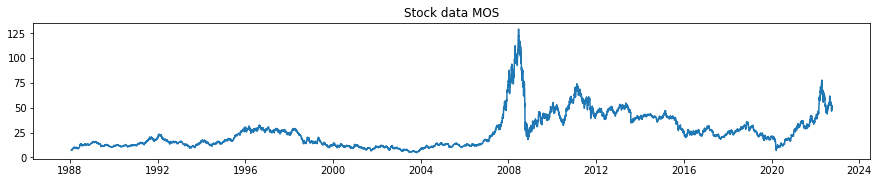

In [ ]:
plot_train_data(df)

### Create one big training dataframe
Neural network will be trained on this dataframe. Data will be split eventually into training and testing set.

In [ ]:
tickers = ['F', 'IBM', 'GE', 'AAPL', 'ADM', "C", "TLT", "AAP", "ORLY", "EPD",
           'XOM', 'GM','MMM','KO','PEP','SO','GS',
          'HAS','PEAK','HPE','HLT','HD','HON','HRL','HST','HPQ','HUM','ILMN', 
          'INTC','ICE','INTU','ISRG','IVZ','IRM','JNJ','JPM','JNPR','K','KMB', 
          'KIM', 'KMI','KSS','KHC', 'KR',
          'LEG', 'LIN', 'LMT','LOW',
          'MAR', 'MA','MCD','MDT', 'MRK',
          'MET', 'MGM', 'MU','MSFT', 'MAA',
          "SBK", "PG",
          'MNST', 'MCO','MS', 'MSI', 
          'MMM', 'ABT','ACN','ATVI','ADBE','AMD','A','AKAM','ARE','GOOG','AMZN','AAL',]

In [ ]:
# parent dataframe to append to
ticker = "SPY"
df = get_data(ticker)
df = compute_technical_indicators(df)
df = compute_features(df)
df = define_target_condition(df)

connected to yahoo


In [ ]:
for ticker in tickers:
    t_df = get_data(ticker)
    t_df = compute_technical_indicators(t_df)
    t_df = compute_features(t_df)
    t_df = define_target_condition(t_df)
    
    df = pd.concat([df, t_df], ignore_index=True)

connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to

In [ ]:
df.tail()

Date   High    Low   Open  Close      Volume  Adj Close     MA50    MA100     MA200  ...  upTrendMA  upTrendLR  3LineStrike  3WhiteSoldiers  BullishEngulfing  Hammer  InvertedHammer  MorningStar  MorningDojiStar  target_cls
703656 2022-10-03  12.23  11.65  12.02  11.92  41156700.0      11.92  13.8250  14.3881  15.93315  ...          0          0            0               0                 0       0               0            0                0           0
703657 2022-10-04  13.05  12.30  12.31  12.95  47616000.0      12.95  13.8090  14.3579  15.91530  ...          0          0            0               0                 0       0               0            0                0           0
703658 2022-10-05  12.96  12.43  12.63  12.87  28172500.0      12.87  13.7978  14.3317  15.89490  ...          0          0            0               0                 0       0               0            0                0           0
703659 2022-10-06  13.00  12.40  12.77  12.73  31569300.0      12.73  13.7730  14.2932  15.87205  ...          0          0            0               0                 0       0               0            0                0           0
703660 2022-10-07  12.54  11.95  12.50  12.18  37269800.0      12.18  13.7414  14.2495  15.84235  ...          0          0            0               0                 0       0               0            0                0           0

[5 rows x 42 columns]

In [ ]:
df.shape

(703661, 42)

In [ ]:
more_tickers = [
    "GLD",
    "SLV",
    "SILJ",
    "SIL",
    "GDX",
    "GDXJ",
    "FNV",
    "NEM",
    "RGLD",
    "GOLD",
]

In [ ]:
for ticker in more_tickers:
    t_df = get_data(ticker)
    t_df = compute_technical_indicators(t_df)
    t_df = compute_features(t_df)
    t_df = define_target_condition(t_df)
    
    df = pd.concat([df, t_df], ignore_index=True)

connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo


In [ ]:
df.shape

(759683, 42)

## Train-Test split and Training part

In [ ]:
# predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','normRSI','oversoldRSI','overboughtRSI',
#                    'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40',
#                    'aboveEMA50','aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90','aboveEMA100']
predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','normRSI','oversoldRSI','overboughtRSI',
                   'aboveMA50', 'aboveMA200', "upTrendLR", "upTrendMA", "3LineStrike", "3WhiteSoldiers",
                   "BullishEngulfing", "Hammer", "InvertedHammer", "MorningStar", "MorningDojiStar"]

In [ ]:
def splitting_and_training(df, predictors_list, test_size=0.3):
    # __predictors__
    
    # __features__
    X = df[predictors_list].fillna(0).values
    
    # __targets__
    y_cls = df.target_cls.fillna(0).values
    # y_cls.tail(10)
    
    # __train test split__
    from sklearn.model_selection import train_test_split
    y = y_cls
    X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    print ("X_cls_train.shape:", X_cls_train.shape)
    print ("y_cls_train.shape:", y_cls_train.shape)
    print ("X_cls_test.shape:", X_cls_test.shape)
    print ("y_cls_test.shape:", y_cls_test.shape)
    
    return X_cls_train, X_cls_test, y_cls_train, y_cls_test

## Neural Network

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 30)
        self.layer3 = nn.Linear(30, 2)
        self.drop = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.drop(x)
        x = F.relu(self.layer2(x))
        x = self.drop(x)
        x = F.softmax(self.layer3(x)) # To check with the loss function
        
        return x

## Features & Labels

In [ ]:
# so far the variables are dataframes, not arrays or tensors
features_train, features_test, labels_train, labels_test = splitting_and_training(df, predictors_list)

X_cls_train.shape: (531778, 17)
y_cls_train.shape: (531778,)
X_cls_test.shape: (227905, 17)
y_cls_test.shape: (227905,)


In [ ]:
features_train[:3]

array([[0.        , 0.        , 0.        , 0.47512927, 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.47869024, 0.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.4529461 , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
labels_train[:3]

array([0, 1, 1])

In [ ]:
# make data tensors
features_train = Variable(torch.Tensor(features_train).float())
features_test = Variable(torch.Tensor(features_test).float())
labels_train = Variable(torch.Tensor(labels_train).long())
labels_test = Variable(torch.Tensor(labels_test).long())

x_train = features_train
y_train = labels_train

In [ ]:
# Training
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 250
# epochs = 10 # starting small for testing

def print_(loss):
    print("The loss calculated:", loss)

## Actual Training Using Several Epochs

In [ ]:
for epoch in range(1, epochs+1):
    print ("Epoch #", epoch)
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    print_(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

Epoch # 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


The loss calculated: 0.6930667757987976
Epoch # 2
The loss calculated: 0.6889414191246033
Epoch # 3
The loss calculated: 0.6847856640815735
Epoch # 4
The loss calculated: 0.6801096200942993
Epoch # 5
The loss calculated: 0.675054669380188
Epoch # 6
The loss calculated: 0.6697238087654114
Epoch # 7
The loss calculated: 0.6641478538513184
Epoch # 8
The loss calculated: 0.6588072180747986
Epoch # 9
The loss calculated: 0.6541982889175415
Epoch # 10
The loss calculated: 0.6502383351325989
Epoch # 11
The loss calculated: 0.6471039056777954
Epoch # 12
The loss calculated: 0.6446722149848938
Epoch # 13
The loss calculated: 0.643032431602478
Epoch # 14
The loss calculated: 0.6424338221549988
Epoch # 15
The loss calculated: 0.6418172717094421
Epoch # 16
The loss calculated: 0.6419863700866699
Epoch # 17
The loss calculated: 0.6417888402938843
Epoch # 18
The loss calculated: 0.6420364379882812
Epoch # 19
The loss calculated: 0.642114520072937
Epoch # 20
The loss calculated: 0.6421688199043274
Ep

In [ ]:
# Prediction
x_test = features_test
pred = model(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [ ]:
pred = pred.detach().numpy()

In [ ]:
pred

array([[0.63433075, 0.36566922],
       [0.2856654 , 0.71433455],
       [0.33491254, 0.6650874 ],
       ...,
       [0.8827327 , 0.11726726],
       [0.89606297, 0.10393704],
       [0.34689748, 0.6531025 ]], dtype=float32)

In [ ]:
len(pred)

227905

## Accuracy Evaluation

In [ ]:
print ("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))

The accuracy is 0.6447642658125096


In [ ]:
# Checking for first value
np.argmax(model(x_test[0]).detach().numpy(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0

In [ ]:
labels_test[0]

tensor(1)

In [ ]:
torch.save(model, "stocks-pytorch.pkl")

In [ ]:
saved_model = torch.load("stocks-pytorch.pkl")

In [ ]:
np.argmax(saved_model(x_test[0]).detach().numpy(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0

In [ ]:
x_test[0]

tensor([0.0000, 0.0000, 0.0000, 0.3785, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [ ]:
for i in x_test[:3]:
  print(i)
  prediction = np.argmax(saved_model(i).detach().numpy(), axis=0)
  print("Prediction:", prediction)

tensor([0.0000, 0.0000, 0.0000, 0.3785, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
Prediction: 0
tensor([0.0000, 0.0000, 1.0000, 0.2784, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
Prediction: 1
tensor([0.0000, 0.0000, 1.0000, 0.2302, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
Prediction: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


## Prediction on Unknown Data
Let's provide the model with new stock data it was not trained on to see how it performs

In [ ]:
# ticker = "DBA"
# ticker = "DBC"
# ticker = "EPD"
# ticker = "MPC"
# ticker = "MOS"
ticker = "SWN"

In [ ]:
def plot_stock_prediction(df, ticker):
    # plot  values and significant levels
    plt.figure(figsize=(30,7))
    plt.title('Predictive model ' + str(ticker))
    plt.plot(df['Date'], df['Adj Close'], label='Adj Close', alpha=0.2)

    plt.plot(df['Date'], df['MA50'], label='MA50', alpha=0.2)
    plt.plot(df['Date'], df['MA200'], label='MA200', alpha=0.2)
    plt.plot(df['Date'], df['upTrendLR'], label='Up Trend LR', alpha=0.2)
    plt.plot(df['Date'], df['upTrendMA'], label='Up Trend MA', alpha=0.2)


    plt.scatter(df['Date'], df['Buy']*df['Adj Close'], label='Buy', marker='^', color='magenta', alpha=0.15)
    #lt.scatter(df.index, df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()

    return None  

In [ ]:
new_df = get_data(ticker)

connected to yahoo


In [ ]:
new_df = compute_technical_indicators(new_df)
new_df = compute_features(new_df)
new_df=define_target_condition(new_df)

In [ ]:
saved_model

Model(
  (layer1): Linear(in_features=17, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=30, bias=True)
  (layer3): Linear(in_features=30, out_features=2, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)

In [ ]:
def predict_timeseries(df):
    
    # making sure we have good dimensions
    # column will be rewritten later
    df['Buy'] = df['target_cls']
    
    for i in range(len(df)):
        X_cls_valid = [[df['aboveSAR'][i],df['aboveUpperBB'][i],df['belowLowerBB'][i],
                        df['normRSI'][i],df['oversoldRSI'][i],df['overboughtRSI'][i],
                        df['aboveMA50'][i],df['aboveMA200'][i],df['upTrendLR'][i],
                        df['upTrendMA'][i],df['3LineStrike'][i],df['3WhiteSoldiers'][i],
                        df['BullishEngulfing'][i],df['Hammer'][i],df['InvertedHammer'][i],
                        df['MorningStar'][i],df['MorningDojiStar'][i]]]

        x_test = Variable(torch.Tensor(X_cls_valid).float())    
        
        # print('x_test', x_test)
        

        # print('i', i)
        prediction = np.argmax(saved_model(x_test[0]).detach().numpy(), axis=0)
        # print('prediction', prediction)        
  
    
        df['Buy'][i] = prediction


    print(df.tail())    
        
    return df

In [ ]:
new_df = predict_timeseries(new_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


            Date  High   Low  Open  Close      Volume  Adj Close    MA50   MA100    MA200  ...  upTrendLR  3LineStrike  3WhiteSoldiers  BullishEngulfing  Hammer  InvertedHammer  MorningStar  MorningDojiStar  target_cls  Buy
10728 2022-10-03  6.60  6.25  6.25   6.55  45017800.0       6.55  7.1414  7.2263  6.46070  ...          0            0               0                 0       0               0            0                0           0    1
10729 2022-10-04  7.10  6.61  6.70   7.08  48087000.0       7.08  7.1392  7.2310  6.47335  ...          0            0               0                 0       0               0            0                0           0    1
10730 2022-10-05  7.34  6.80  7.10   7.25  33467900.0       7.25  7.1386  7.2394  6.48705  ...          0            0               0                 0       0               0            0                0           0    1
10731 2022-10-06  7.33  6.93  7.19   6.95  27081500.0       6.95  7.1310  7.2431  6.50000  ...          

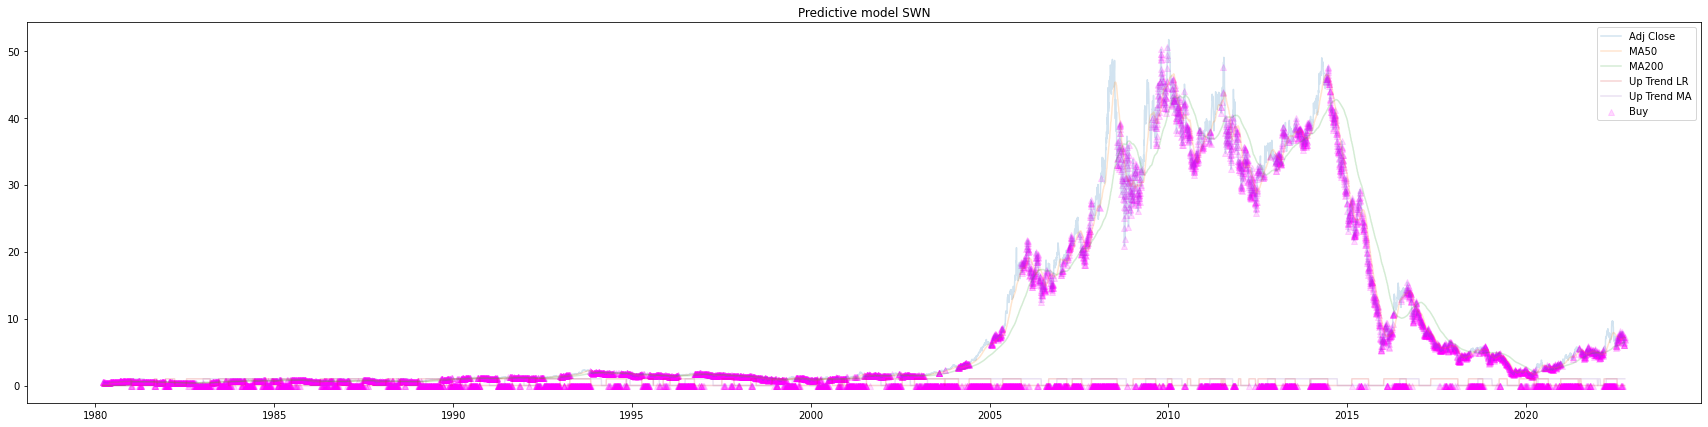

In [ ]:
plot_stock_prediction(new_df, ticker)

In [ ]:
new_df.shape

(10733, 43)

In [ ]:
temp_df = new_df.loc[new_df["Date"] >= "2020-01-01", :]

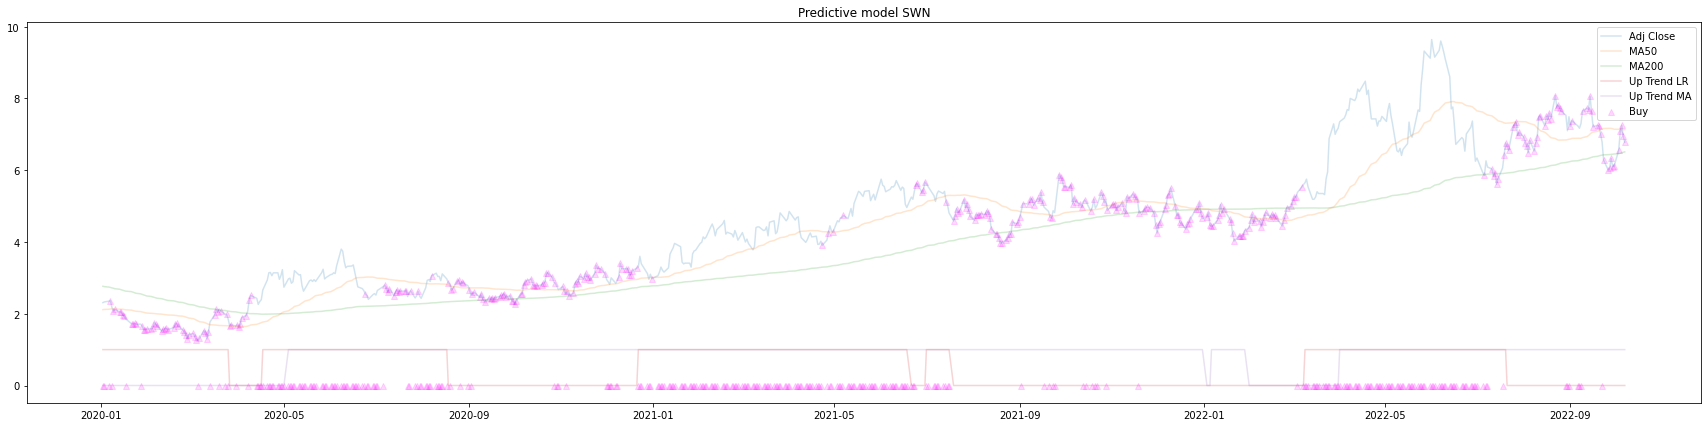

In [ ]:
plot_stock_prediction(temp_df, ticker)